In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '..')
from utils import *


In [30]:
def ants_preprocess(data):
    data_with_od = create_od_column(data, ['OriginCty', 'DestinationCty'])

    data_with_layover = calculate_total_layover_time(data_with_od, as_ratio=True)

    data_with_layover2 = calculate_distance_difference(data_with_layover, as_ratio=True)

    data_with_redirect_ratio = redirect_ratio(data_with_layover2)

    droped_values = drop_neg_layover_time(data_with_redirect_ratio)

    return droped_values


In [3]:
# rand_data = pd.read_csv('../raw_data/rand_200k_sample', low_memory=False, index_col='Unnamed: 0')
horz_data = pd.read_csv('../raw_data/all_data_60_horizon')


In [6]:
horz_data.dropna(subset='OriginApt', inplace=True)


In [10]:
horz_data['ODRedirects'].value_counts(normalize=True)


ODRedirects
1      0.134784
2      0.087998
3      0.066713
4      0.053948
5      0.044996
         ...   
676    0.000005
623    0.000005
855    0.000005
513    0.000005
812    0.000004
Name: proportion, Length: 826, dtype: float64

In [11]:
horz_data['ODRedirects'].describe()


count    2.552515e+06
mean     3.614161e+01
std      1.021254e+02
min      1.000000e+00
25%      3.000000e+00
50%      9.000000e+00
75%      2.900000e+01
max      4.509000e+03
Name: ODRedirects, dtype: float64

<Axes: >

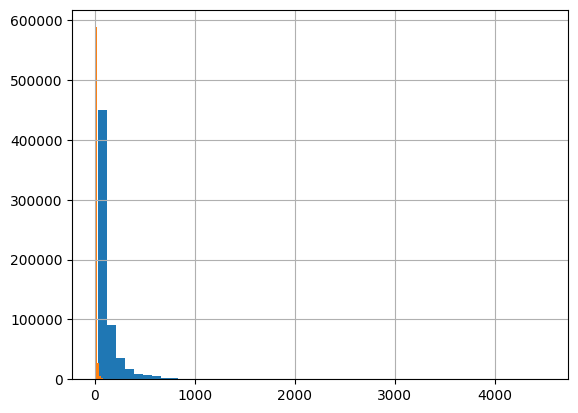

In [16]:
few_od_redirects_mask = horz_data['ODRedirects'] > 29
horz_data[few_od_redirects_mask]['ODRedirects'].hist(bins=50)


In [17]:
horz_data[few_od_redirects_mask]['ItineraryRedirects'].value_counts(normalize=True)


ItineraryRedirects
1      0.345684
2      0.154439
3      0.093875
4      0.064881
5      0.048703
         ...   
787    0.000002
530    0.000002
844    0.000002
342    0.000002
247    0.000002
Name: proportion, Length: 336, dtype: float64

In [23]:
horz_data[few_od_redirects_mask]['ItineraryRedirects'].describe()


count    625820.000000
mean          6.374354
std          12.446199
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max        1011.000000
Name: ItineraryRedirects, dtype: float64

In [80]:
processed_data = ants_preprocess(horz_data)


<Axes: >

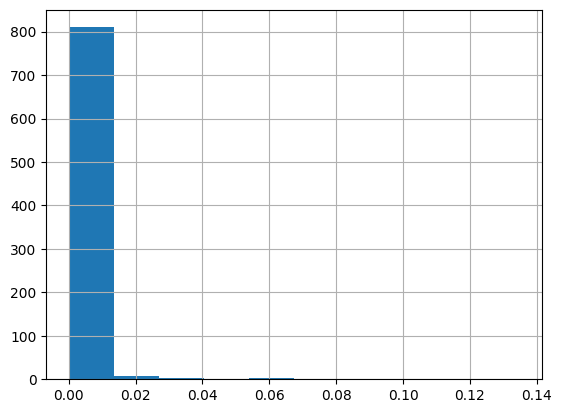

In [66]:
processed_data['ODRedirects'].value_counts(normalize=True).hist()


In [44]:
list_of_od = processed_data['OD'].unique()


In [46]:
len(list_of_od)


140002

In [47]:
processed_data['TravelHorizonDays'].unique()


array([ 9,  2, 26,  7, 19, 18, 24, 22,  8, 12, 23, 21,  1,  3, 10, 13, 17,
        0, 16, 27,  5,  4, 20, 30,  6, 11, 14, 29, 25, 28, 15])

In [64]:
for i in range(5,16):
    for o in list_of_od[:10]:
        mask = (processed_data['TravelHorizonDays'] == i) & (processed_data['OD'] == o)
        masked_data = processed_data[mask]
        if len(masked_data) == 0:
            pass
        else:
            print(masked_data['redirect_ratio'].min())


0.07692307692307693
0.5
0.5
0.16666666666666666
1.0
0.5
1.0
1.0
0.5
0.3333333333333333
1.0
1.0
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.3333333333333333
1.0
0.3333333333333333
1.0
0.5
0.5
1.0
1.0
1.0
0.25
0.5
1.0


In [81]:
processed_data['log_ODRedirects'] = np.log1p(processed_data['ODRedirects'])


<Axes: >

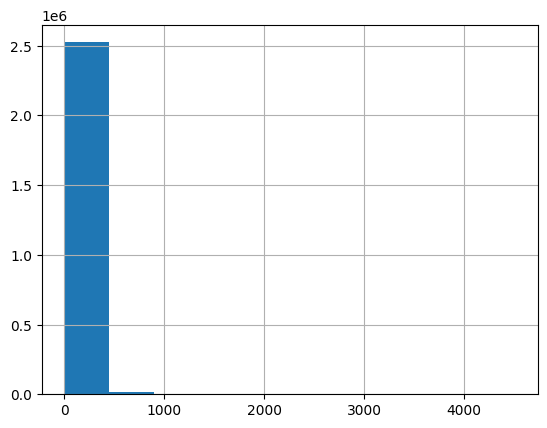

In [82]:
processed_data['ODRedirects'].hist()


<Axes: >

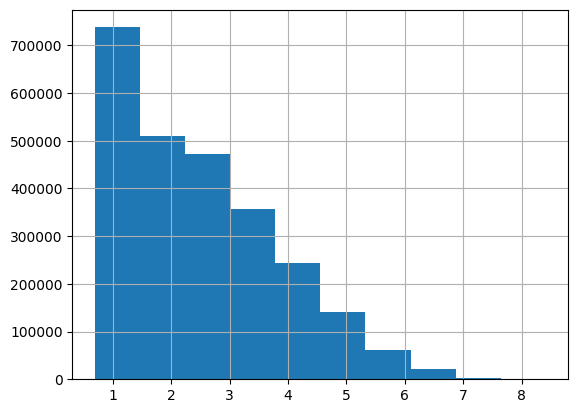

In [83]:
processed_data['log_ODRedirects'].hist()


In [84]:
processed_data['weighted_redirect_ratio'] = processed_data['redirect_ratio'] * processed_data['log_ODRedirects']


In [88]:
processed_data['weighted_redirect_ratio'].describe()


count    2.547719e+06
mean     5.860969e-01
std      4.736264e-01
min      1.866057e-03
25%      2.397895e-01
50%      4.804500e-01
75%      6.931472e-01
max      6.392469e+00
Name: weighted_redirect_ratio, dtype: float64

<Axes: >

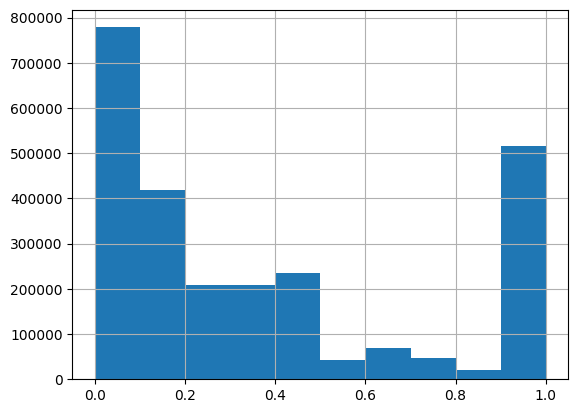

In [87]:
processed_data['redirect_ratio'].hist()
